In [1]:
import copy
import time

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:

"""
https://www.w3resource.com/python-exercises/python-basic-exercise-65.php
"""

def time_taken(start, end):
    """Human readable time between `start` and `end`

    :param start: time.time()
    :param end: time.time()
    :returns: day:hour:minute:second.millisecond
    """
    my_time = end-start
    day = my_time // (24 * 3600)
    my_time = my_time % (24 * 3600)
    hour = my_time // 3600
    my_time %= 3600
    minutes = my_time // 60
    my_time %= 60
    seconds = my_time
    milliseconds = ((end - start)-int(end - start))
    day_hour_min_sec = str('%02d' % int(day))+":"+str('%02d' % int(hour))+":"+str('%02d' % int(minutes))+":"+str('%02d' % int(seconds)+"."+str('%.3f' % milliseconds)[2:])
    
    return day_hour_min_sec

# 8 Recursion and Dynamic Programming
## Interview Questions, Page: 134

In [3]:
def fibonacci(n, men):
    # Base case
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    elif n in men:
        return men[n]
    else:
        # Recurrsion
        men[n] = fibonacci(n-1, men) + fibonacci(n-2, men)
        return men[n]

'''
Fibonacci sequence: 0, 1, 1, 2, 3, 5, 8, 13, 21 ...
'''

n = 6
print("fibonacci: ", fibonacci(n, {}))

fibonacci:  8


In [4]:
"""
Q 8.1
Triple Step: A child is running up a staircase with n steps and can hop either 1 step, 2 steps, or 3 steps at a time.
Implement a method to count how many possible ways the child can run up the stairs.
"""

# Brute Force Solution
def count_steps(n):
    # Base case
    if n < 0:
        # Handeling invalid moves
        return 0
    elif n == 0:
        # 0 stair left
        return 1 # 1 possible way
    else:
        # Recurrsion
        return count_steps(n-1) + count_steps(n-2) + count_steps(n-3)

start_time = time.time()
print(count_steps(26))
print("day, hour, minute, second.millisecond->", time_taken(start_time, time.time()))

4700770
day, hour, minute, second.millisecond-> 00:00:00:04.264


In [5]:
# Memoization Solution
def count_steps(n, memo):
    # Base case
    if n < 0:
        # Handeling invalid moves
        return 0
    elif n == 0:
        # 0 stair left
        return 1 # 1 possible way
    elif n in memo:
        return memo[n] # Memoization
    else:
        # Recurrsion
        memo[n] = count_steps(n-1, memo) + count_steps(n-2, memo) + count_steps(n-3, memo)
        return memo[n]

start_time = time.time()
print(count_steps(26, {}))
print("day, hour, minute, second.millisecond->", time_taken(start_time, time.time()))

4700770
day, hour, minute, second.millisecond-> 00:00:00:00.000


In [1]:
from typing import List

def find_magic_index(nums: List[int]) -> int:
    
    for i, n in enumerate(nums):
        if i == n:
            return i

'''
Time: O(N)
Space: O(1)
'''

# Binary Search Approach for sorted and distinct numbers
def find_magic_index(nums: List[int], start=0, end=None) -> int:
    
    if end is None:
        end = len(nums)
    
    if end < start:
        return -1
    
    mid = (start+end) // 2
    
    if nums[mid] == mid:
        return mid
    elif mid < nums[mid]:
        return find_magic_index(nums, start, mid-1) # Search left
    else:
        return find_magic_index(nums, mid+1, end) # Search right

'''
Time: O(logN)
Space: O(1)
'''

# Binary Search Approach for sorted and not distinct numbers
def find_magic_index(nums: List[int], start=0, end=None) -> int:
    
    if end is None:
        end = len(nums)
    
    if end < start:
        return -1
    
    mid = (start+end) // 2
    
    if nums[mid] == mid:
        return mid
        
    # Search left completely
    left = min(mid - 1, nums[mid])
    left = find_magic_index(nums, start, left)
    if left >= 0:
        return left

    # Search right completely
    right = max(mid + 1, nums[mid])
    right = find_magic_index(nums, right, end)
    
    return right
    
'''
Time: O(logN)
Space: O(1)
'''

# Distinct numbers
nums_list = [[0,1,2,3,50], [-40,-20,-1,1,2,3,5,7,9,12,13]]
# Not distinct numbers
nums_list = [[1,2,1,3,50], [-10,-5,2,2,2,3,4,7,9,12,13], [-10,-5,0,2,2,3,4,7,9,12,13], [-10,1,1,1,3,20]]
for nums in nums_list:
    ans = find_magic_index(nums)
    print('ans: ', ans)

ans:  3
ans:  2
ans:  7
ans:  1


In [10]:
"""
Q 8.5
Recursive Multiply: Write a recursive function to multiply two positive integers without using the * operator (or / operator).
You can use addition, subtraction, and bit shifting, but you should minimize the number of those operations.
"""

def multiplay(a, b, s):
    print("b:", b)
    if b == 0:
        return s
    
    return multiplay(a, b-1, s+a)  # GT: Always return the recursive result

a, b = 5, 10

print("Result:", multiplay(max(a, b), min(a, b), 0)) # O(s), where s is the smaller of the two numbers

b: 5
b: 4
b: 3
b: 2
b: 1
b: 0
Result: 50


In [11]:
"""
Q 8.7
Permutations without Dups: Write a method to compute all permutations of a string of unique characters.
"""

# https://stackoverflow.com/questions/8306654/finding-all-possible-permutations-of-a-given-string-in-python

def permutations(string, step = 0):
    #print("string: ", string, ", step: ", step)

    # if we've gotten to the end, print the permutation
    if step == len(string):
        print("".join(string))

    # everything to the right of step has not been swapped yet
    for i in range(step, len(string)):

        # copy the string (store as array)
        string_copy = [character for character in string]

        # swap the current index with the step
        #print("1 string_copy: ", string_copy)
        #print("Swap: ", i, step, string_copy[i], string_copy[step])
        string_copy[step], string_copy[i] = string_copy[i], string_copy[step]
        #print("2 string_copy: ", string_copy)

        # recurse on the portion of the string that has not been swapped yet (now it's index will begin with step + 1)
        permutations(string_copy, step + 1)
    
permutations("abc")

abc
acb
bac
bca
cba
cab


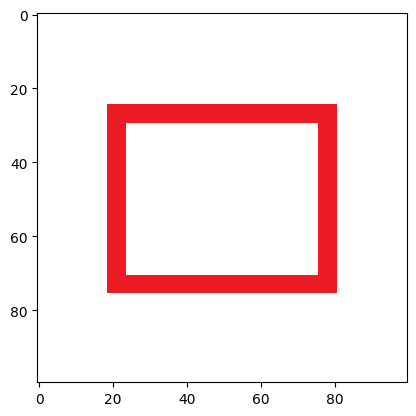

(100, 100, 3)


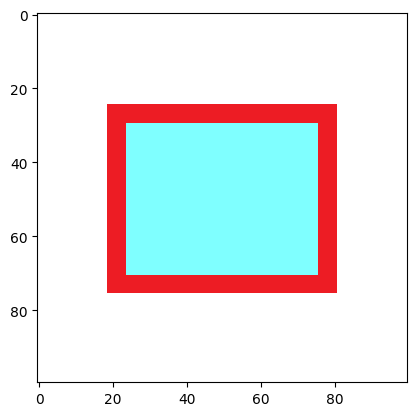

In [12]:
"""
8.10
Paint Fill: Implement the "paint fill" function that one might see on many image editing programs.
That is, given a screen (represented by a two-dimensional array of colors), a point, and a new color,
fill in the surrounding area until the color changes from the original color.
"""

image = mpimg.imread("CtCI_8-10.png")
#image[5][5] = [0.5, 1, 1]
plt.imshow(image, cmap=plt.cm.gray)
plt.show()
print(image.shape)

# print(image[40][23])
# print(image[5][5])

def paint_fill(img, r, c, color, mem={}):
    if (r, c) not in mem:
        ori_color = img[r][c][0]
        img[r][c][0] = color
        mem[(r, c)] = color

        max_r, max_c, _ = img.shape

        if max_r > r+1 and img[r+1][c][0] == ori_color:
            img = paint_fill(img, r+1, c, color, mem)
        if 0 < r-1 and img[r-1][c][0] == ori_color:
            img = paint_fill(img, r-1, c, color, mem)
        if max_c > c+1 and img[r][c+1][0] == ori_color:
            img = paint_fill(img, r, c+1, color, mem)
        if 0 < c-1 and img[r][c-1][0] == ori_color:
            img = paint_fill(img, r, c-1, color, mem)
    
    return img

image = paint_fill(image, 40, 40, 0.5) # Inside rectangle
#image = paint_fill(image, 40, 20, 0.5) # On rectangle
#image = paint_fill(image, 5, 5, 0.5) # Outside rectangle - not optimal
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [13]:
"""
Q 8.11
Coins: Given an infinite number of quarters (25 cents), dimes (10 cents), nickels (5 cents), and pennies (1 cent),
write code to calculate the number of ways of representing n cents.
"""

def makeChange(amount, denoms, index=0, mem={}):
    if (amount, index) in mem and mem[(amount, index)] > 0:
        return mem[(amount, index)]
    if index >= len(denoms)-1:
        return 1 # one denom remaining
    
    demo_amount = denoms[index]
    #print("demo_amount: ", demo_amount)
    
    ways = 0
    i = 0
    
    while i * demo_amount <= amount:
        # go to next denom, assuming i coins of denomAmount
        amount_remaining = amount - i * demo_amount
        ways += makeChange(amount_remaining, denoms, index + 1, mem) # Basically, try a new demo_amount and i
        
        i += 1
    
    mem[(amount, index)] = ways
    
    # print(mem)
    
    return ways

amount = 50
denoms = [25, 10, 5, 1]
print(makeChange(amount, denoms))

49
